## Lab 11, solutions to exercises and additional notes

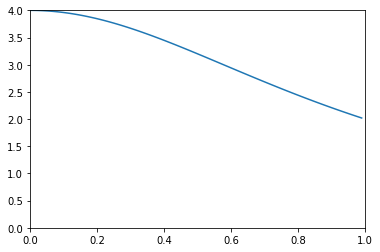

In [2]:
# plotting the function we want to integrate

%matplotlib inline
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

def f(x):
    return 4/(1+x*x)

x_plot = np.arange(0,1,0.01)
plt.plot(x_plot, f(x_plot))
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.show()

In [3]:
# Monte Carlo integration by putting the function inside a box

nsteps = 10000
counter = 0

for i in range(nsteps):
    
    # the box goes from 0 to 1 in x-direction and from 0 to 4 in y-direction
    x = rn.rand()
    y = 4*rn.rand()
    
    # check if this point is below the curve (like rejection method)
    if y < f(x):
        counter += 1
    
# the number of points under the curve compared to the total number of points
# is the same as the area under the curve (integral) compared to the area of the box
area_box = 4*1
integral = counter/nsteps*area_box
print("The integral equals: ", integral)
print("Exact value should be: ", np.pi)
print("Relative error w.r.t. exact value: ", abs(integral-np.pi)/np.pi)

The integral equals:  3.146
Exact value should be:  3.141592653589793
Relative error w.r.t. exact value:  0.0014029019342054624


In [4]:
# direct sampling method

nsteps = 10000
counter = 0
integral = 0

for i in range(nsteps):
    
    # using uniform distribution for x
    x = rn.rand()
    integral += f(x)
    
# here the domain has length 1, so the function average is the same as the integral
length_interval = 1
integral = integral/nsteps*length_interval
print("The integral equals: ", integral)
print("Exact value should be: ", np.pi)
print("Relative error w.r.t. exact value: ", abs(integral-np.pi)/np.pi)

The integral equals:  3.1526444672769576
Exact value should be:  3.141592653589793
Relative error w.r.t. exact value:  0.0035179015568857787


In [5]:
# importance sampling

# let's try the Gaussian probability distribution
def gauss(x):
    return np.exp(-x*x/2)/np.sqrt(2*np.pi)

nsteps = 10000
integral = 0

for i in range(nsteps):
    
    # using gaussian distribution with sigma=1 for x
    x = rn.normal()
    
    # careful, we are only integrating between 0 and 1!
    # what happens if x falls outside of this range?
    
    if x >= 0 and x <= 1:
        integral += f(x)/gauss(x)
        
    # this is not very efficient because we are throwing away most of our x-values
    # we could improve this by, for example, taking the absolute value of x, so that negative x are also used
    # if we do this, we also need to divide our final result by 2, 
    # since we have changed the normalization factor

integral = integral/nsteps
print("The integral equals: ", integral)
print("Exact value should be: ", np.pi)
print("Relative error w.r.t. exact value: ", abs(integral-np.pi)/np.pi)

The integral equals:  3.1690546407616376
Exact value should be:  3.141592653589793
Relative error w.r.t. exact value:  0.008741422011050526


In [12]:
# Markov chain method

# for this example, let's also use importance sampling with exponential p(x)
def p(x): 
    return np.exp(-x)

nsteps = 10000
x = 0.5
integral = 0

for i in range(nsteps):
    
    # changing the value of x by adding a random float between -0.05 and 0.05 to old x
    # how we choose the new x is our decision, this is just one option
    xchange = rn.rand()*0.1-0.05
    xnew = x + xchange
    
    # careful about leaving the integration domain!
    # if this happens, we will just reenter on the other side
    if xnew < 0: xnew += 1
    if xnew > 1: xnew -= 1
    
    # Metropolis algorithm
    if p(xnew)/p(x) >= 1: 
        x = xnew
    else: 
        chance = rn.rand()
        if chance <= p(xnew)/p(x): 
            x = xnew
    # sampling the integral
    integral += f(x)/p(x)

# because we are only generating values of x between 0 and 1
# we need to recalculate the norm of p(x), namely integral of p(x) between 0 and 1
norm = 1-np.exp(-1)
integral = integral/nsteps*norm

print("The integral equals: ", integral)
print("Exact value should be: ", np.pi)
print("Relative error w.r.t. exact value: ", abs(integral-np.pi)/np.pi)

The integral equals:  3.150252860897367
Exact value should be:  3.141592653589793
Relative error w.r.t. exact value:  0.0027566296024018055


In [13]:
# as before, but now we are suggesting xnew uniformly over the entire domain

x = 0.5
integral = 0

for i in range(nsteps):
    
    # how we choose the new x is our decision, this is another option
    xnew = rn.rand()
    
    # Metropolis algorithm
    if p(xnew)/p(x) >= 1: 
        x = xnew
    else: 
        chance = rn.rand()
        if chance <= p(xnew)/p(x): 
            x = xnew
    # sampling the integral
    integral += f(x)/p(x)

# because we are only generating values of x between 0 and 1
# we need to recalculate the norm of p(x), namely integral of p(x) between 0 and 1
norm = 1-np.exp(-1)
integral = integral/nsteps*norm

print("The integral equals: ", integral)
print("Exact value should be: ", np.pi)
print("Relative error w.r.t. exact value: ", abs(integral-np.pi)/np.pi)

The integral equals:  3.1432179643332145
Exact value should be:  3.141592653589793
Relative error w.r.t. exact value:  0.0005173524777517664
